In [1]:
#1) Randomly generated 5000 stock price curves with drawing. μ=6%, σ=13%
#6% is our population mean and 13% is our population standard mean

import numpy as np
from matplotlib import pyplot as plt
from math import sqrt
import pandas as pd

In [2]:
mu = 0.06  # return
sigma = 0.13  # volatility
dt = 1 / 242  # length of step
T = 10  # Entire period
S_0 = 10  # Initial Price
N_periods = int(T / dt)  # Number of steps
N_stocks = 5000  # Number of stocks

In [3]:
dW = np.random.normal(loc=0.0, scale=1.0, size=(N_periods, N_stocks)) * np.sqrt(dt)

drift = (mu - 1 / 2 * sigma ** 2) * dt * np.ones((N_periods, N_stocks))
diffusion = sigma * dW
St = S_0 * np.exp(np.cumsum(drift + diffusion, axis=0))

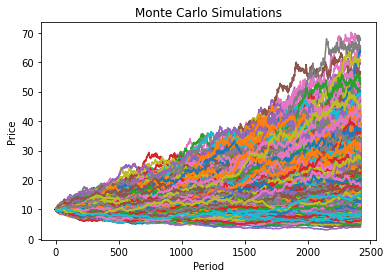

In [4]:
plot(np.arange(1, N_periods + 1, 1), St)
plt.title('Monte Carlo Simulations')
plt.xlabelplt.('Period')
plt.ylabel('Price')
plt.show()

annualized return rate has a value of: 0.005843900161826454



percentage return rate: 0.5843900161826454


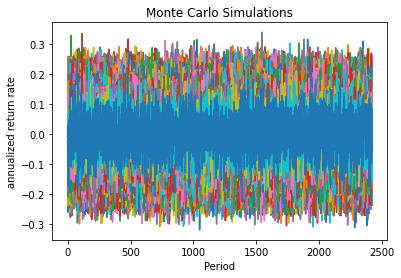

In [23]:
#question2
#Calculate the annualized return rate,
#annual return rate (ending value/ beginning value)^(1/no of years) - 1
return_rate = ((mu + 1)**(1 / T)) - 1
print(f'annualized return rate has a value of: {return_rate}')

print("\n\n")
#displays the annulized return percentage
percentage_rate = return_rate * 100
print(f'percentage return rate: {percentage_rate}')

#visualizations for return rate

plt.plot(return_rate)
plt.plot(np.arange(1, N_periods + 1, 1), dW)
plt.title('Monte Carlo Simulations')
plt.xlabel('Period')
plt.ylabel('annualized return rate')
plt.show()




value of volatility is : 0.41109609582188933





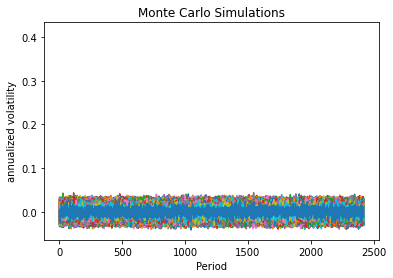

In [25]:
#annualized volatility
annualized_volatility = sigma * np.sqrt(10)
print(f'value of volatility is : {annualized_volatility}')

print("\n\n")

#visualization for volality

plt.plot(annualized_volatility)
plt.plot(np.arange(1, N_periods + 1, 1), diffusion)
plt.title('Monte Carlo Simulations')
plt.xlabel('Period')
plt.ylabel('annualized volatility')
plt.show()

2636
2103
-49.68124502508344


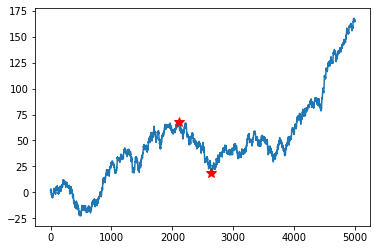

In [16]:
# maximum retracement 
#use the stock to randomly generate start and end position
random_data = np.random.randn(N_stocks).cumsum()
#end poition
end_index = np.argmax(np.maximum.accumulate(random_data)-random_data) 
print(end_index)
#starting position 
start_index = np.argmax(random_data[:end_index])
print(start_index)
#max retracement
max_drawdown = random_data[end_index]-random_data[start_index] 
print(max_drawdown)
 
#visualization
plt.plot(random_data)
plt.plot([start_index, end_index], [random_data[start_index], random_data[end_index]], '*', color="r", markersize=10)
plt.show()

In [22]:
#(3) It is assumed that in each period of dt, the company has a certain probability of jump to bankruptcy.
#It is assumed that the probability of default and bankruptcy is 3% x dt, 
#and the stock price after bankruptcy is 0. 

# Normal distribution function for the probability
import math
def normpdf(N_stocks, mu, sigma):
    variance_value = float(sigma)**2
    denom = (2*math.pi*variance_value)**.5
    num = math.exp(-(float(N_stocks)-float(mu))**2/(2*variance_value))
    return num/denom
#test the distribution
normpdf(4050,0.06,0.13)  


0.0